# Simulation 2_b51 - Analysing


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output, display
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut


import gym
import ctfsql
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
import evaluate as ev
import evaluate_extended as ev2

## Defining the parameters of the simulations

In [2]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**3
#Not good practice, but allows for when it fails on some machines
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
env = gym.make('ctfsql-v0')
folder = ""
retest = False
#folder = "D:/Dropbox2/Dropbox/PhDSource/data/sql/"

## Reading the models

In [4]:
dqn_models = []
import glob
for i in range(n_simulations):
    for file in glob.glob(str(i) + "ignore_simul6*.zip"):
        print(folder + file[:-4], end = ":")
        model = DQN.load(folder + file[:-4])
        dqn_models.append(model)
        print(model)

0ignore_simul6_20210225160300517748:<stable_baselines3.dqn.dqn.DQN object at 0x0000027704FBAC40>
1ignore_simul6_20210225164336887478:<stable_baselines3.dqn.dqn.DQN object at 0x000002776803E250>
2ignore_simul6_20210225172319396466:<stable_baselines3.dqn.dqn.DQN object at 0x000002776804BE20>
3ignore_simul6_20210225212015284047:<stable_baselines3.dqn.dqn.DQN object at 0x0000027799A26F70>
4ignore_simul6_20210225215922393762:<stable_baselines3.dqn.dqn.DQN object at 0x0000027799A26670>
5ignore_simul6_20210225223828728530:<stable_baselines3.dqn.dqn.DQN object at 0x00000277FCDF7C70>
6ignore_simul6_20210225231656072778:<stable_baselines3.dqn.dqn.DQN object at 0x00000277FCDF7370>
7ignore_simul6_20210226095014203105:<stable_baselines3.dqn.dqn.DQN object at 0x00000277FCE23940>
8ignore_simul6_20210226102800896293:<stable_baselines3.dqn.dqn.DQN object at 0x00000277FCE23FD0>
9ignore_simul6_20210226110625059149:<stable_baselines3.dqn.dqn.DQN object at 0x00000277FCE236D0>


In [5]:
if(retest):
    rewards = []
    num_steps = []
    for i in tqdm(range(n_simulations)):
        rewards.append(ev2.test_episodes(dqn_models[i], env, num_episodes=1000))
        reward = rewards[-1]
        #We have to add one because the finding flag action is free.
        num_steps.append(10-np.array(reward) + 1)

In [6]:
if(retest):
    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
    np.savetxt("ignore_simulation2_b51_num_steps"+timestamp+".csv", num_steps)
    np.savetxt("ignore_simulation2_b51_num_steps.csv", num_steps)
else:
    num_steps = np.loadtxt("ignore_simulation2_b51_num_steps.csv")
    
longer_q_table = joblib.load('ignore_simul1_1testdata_20210301213304962153.pkl')[:,0,:]
q_table_data = joblib.load('ignore_simul1_testdata_20210225215819702347.pkl')[:,0,:]
sim2_b32_test_data = np.loadtxt("ignore_simulation2_b32_num_steps.csv")

4.6751 5.0


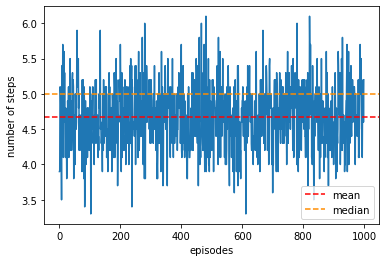

In [7]:
plt.plot(range(n_episodes_test),np.mean(num_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.mean(num_steps),c='red',ls='--',label='mean')
plt.axhline(np.median(num_steps),c='darkorange',ls='--',label='median')
print(np.mean(num_steps), np.median(num_steps))
plt.legend()
plt.savefig("figures/sim2_b51_test1.png")

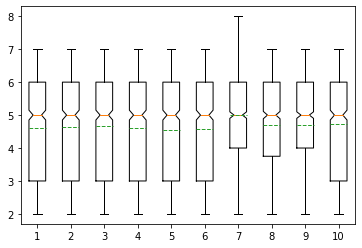

In [8]:
plt.boxplot(num_steps.T, notch = True, showmeans = True, meanline = True)
plt.savefig("figures/sim2_b51_test2.png")

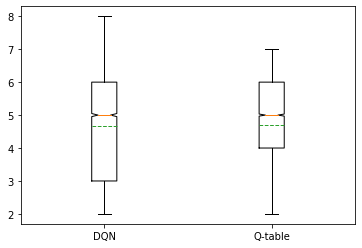

In [9]:
plt.boxplot([num_steps.flatten(),longer_q_table.flatten()], notch = True, 
            labels = ["DQN", "Q-table"], showmeans = True, meanline = True)
plt.savefig("figures/sim2_b51_test4.png")

In [10]:
runs = [q_table_data.flatten(), sim2_b32_test_data.flatten(),num_steps.flatten(), longer_q_table.flatten()]
names = ["Q-table", "DQN_b32", "DQN_b51", "longerQ"]
pct_tables = [[] for i in range(4)]
for some in range(4):
    for i in range(1,10):
        pct_tables[some].append(100*runs[some].tolist().count(i) / len(runs[some]))
print(list(map(sum, pct_tables)))

[100.0, 78.49, 100.0, 100.0]


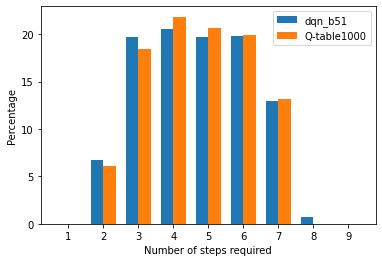

In [11]:
x = np.arange(1,10)
width = .35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pct_tables[2], width, label='dqn_b51')
rects2 = ax.bar(x + width/2, pct_tables[3], width, label='Q-table1000')
ax.set_xticks(x)
ax.set_ylabel('Percentage')
ax.set_xlabel("Number of steps required")
plt.legend()
plt.savefig("figures/sim2_b51_test5.png")

# Appendix plots

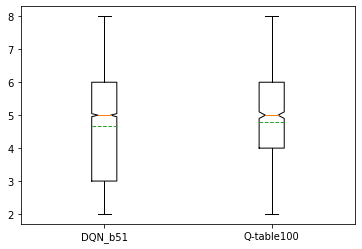

In [12]:
plt.boxplot([num_steps.flatten(),q_table_data.flatten()], notch = True, 
            labels = ["DQN_b51", "Q-table100"], showmeans = True, meanline = True)
plt.savefig("figures/sim2_b51_test3.png")

means [4.795, 214.3773, 4.6751, 4.6918]
medians [5.0, 6.0, 5.0, 5.0]


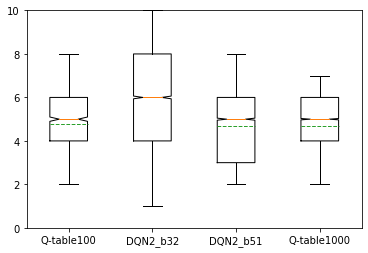

In [13]:
the_list = [q_table_data.flatten(), sim2_b32_test_data.flatten(),num_steps.flatten(),longer_q_table.flatten()]
print("means", list(map(np.mean, the_list)))
print("medians", list(map(np.median, the_list)))

plt.boxplot([q_table_data.flatten(), sim2_b32_test_data.flatten(),num_steps.flatten(), longer_q_table.flatten()], notch = True, 
            labels = ["Q-table100", "DQN2_b32", "DQN2_b51", "Q-table1000"], showmeans = True, meanline = True)
plt.ylim([0,10])
plt.savefig("figures/sim2_b51_notch4.png")

In [14]:
runs = [q_table_data.flatten(), sim2_b32_test_data.flatten(),num_steps.flatten(), longer_q_table.flatten()]
names = ["Q-table100", "DQN_b32", "DQN_b51", "Q-table1000"]
pct_tables = [[] for i in range(4)]
for some in range(4):
    for i in range(1,10):
        print("{:11} {:3} {:5} {:5}%".format(
            names[some], i, runs[some].tolist().count(i), 100*runs[some].tolist().count(i) / len(runs[some])))
        pct_tables[some].append(100*runs[some].tolist().count(i) / len(runs[some]))
print(list(map(sum, pct_tables)))

Q-table100    1     0   0.0%
Q-table100    2    54   5.4%
Q-table100    3   126  12.6%
Q-table100    4   271  27.1%
Q-table100    5   201  20.1%
Q-table100    6   218  21.8%
Q-table100    7   128  12.8%
Q-table100    8     2   0.2%
Q-table100    9     0   0.0%
DQN_b32       1   154  1.54%
DQN_b32       2   510   5.1%
DQN_b32       3  1256 12.56%
DQN_b32       4  1483 14.83%
DQN_b32       5  1407 14.07%
DQN_b32       6  1387 13.87%
DQN_b32       7  1266 12.66%
DQN_b32       8   386  3.86%
DQN_b32       9     0   0.0%
DQN_b51       1     0   0.0%
DQN_b51       2   675  6.75%
DQN_b51       3  1971 19.71%
DQN_b51       4  2051 20.51%
DQN_b51       5  1965 19.65%
DQN_b51       6  1976 19.76%
DQN_b51       7  1293 12.93%
DQN_b51       8    69  0.69%
DQN_b51       9     0   0.0%
Q-table1000   1     0   0.0%
Q-table1000   2   609  6.09%
Q-table1000   3  1841 18.41%
Q-table1000   4  2184 21.84%
Q-table1000   5  2066 20.66%
Q-table1000   6  1989 19.89%
Q-table1000   7  1311 13.11%
Q-table1000   

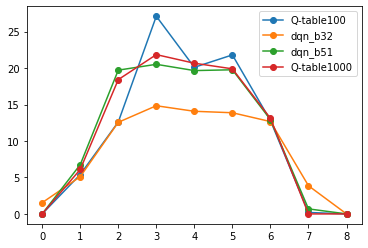

In [15]:
plt.plot(pct_tables[0], "o-", label = "Q-table100")
plt.plot(pct_tables[1], "o-", label = "dqn_b32")
plt.plot(pct_tables[2], "o-", label = "dqn_b51")
plt.plot(pct_tables[3], "o-", label = "Q-table1000")
plt.legend()